<a href="https://colab.research.google.com/github/neethusunil/penguin-classifier/blob/main/Penguin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer 
from sklearn.impute import SimpleImputer
import sidetable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score  
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [107]:
#importing dataset
penguin = pd.read_csv("/content/penguins_lter.csv")
penguin.fillna(0)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,0.00000,0.00000,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,0.0,0.0,0.0,0.0,0,0.00000,0.00000,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,0
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,0
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,0


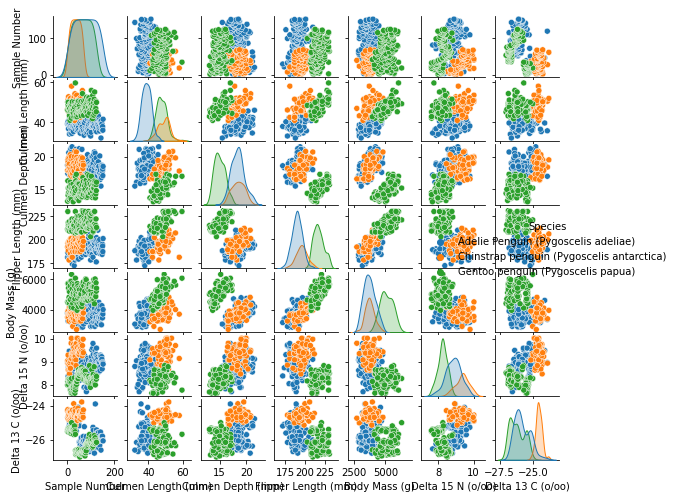

In [30]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguin, hue="Species")
pairplot_figure.fig.set_size_inches(9, 6.5)

In [108]:
penguin = penguin.drop(['studyName','Region','Stage',	'Individual ID','Clutch Completion','Delta 15 N (o/oo)',	'Delta 13 C (o/oo)',	'Comments','Date Egg'], axis=1)

In [109]:
print(penguin.shape)

(344, 8)


In [110]:
penguin.describe(include='all')

,Sample Number,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,NaN,3,3,NaN,NaN,NaN,NaN,3
top,NaN,Adelie Penguin (Pygoscelis adeliae),Biscoe,NaN,NaN,NaN,NaN,MALE
freq,NaN,152,168,NaN,NaN,NaN,NaN,168
mean,63.151163,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,40.430199,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,29.000000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,58.000000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,95.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [111]:
#to identify the unique values in any column
penguin['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [112]:
#Handling missing Values
#Replace the null/junk rows of the column Sex with its mode
mode_sex = penguin['Sex'].mode()[0]  
penguin['Sex'].fillna(mode_sex,inplace=True)
penguin['Sex'] = penguin['Sex'].str.replace(".",mode_sex)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [113]:
# Filling null values of culmenlen, culmendepth, flipper_length_mm and body_mass_g by their mean 
# grouped by species.

penguin['Culmen Length (mm)'].fillna(penguin.groupby('Species')['Culmen Length (mm)'].transform('mean'),inplace=True)
penguin['Culmen Depth (mm)'].fillna(penguin.groupby('Species')['Culmen Depth (mm)'].transform('mean'),inplace=True)
penguin['Flipper Length (mm)'].fillna(penguin.groupby('Species')['Flipper Length (mm)'].transform('mean'),inplace=True)
penguin['Body Mass (g)'].fillna(penguin.groupby('Species')['Body Mass (g)'].transform('mean'),inplace=True)

In [114]:
#After handling the empty values
penguin.describe(include="all")

,Sample Number,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
count,344.000000,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,NaN,3,3,NaN,NaN,NaN,NaN,2
top,NaN,Adelie Penguin (Pygoscelis adeliae),Biscoe,NaN,NaN,NaN,NaN,MALE
freq,NaN,152,168,NaN,NaN,NaN,NaN,179
mean,63.151163,NaN,NaN,43.917431,17.148339,200.930641,4202.839182,NaN
std,40.430199,NaN,NaN,5.454118,1.973561,14.060613,801.461347,NaN
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,29.000000,NaN,NaN,39.200000,15.575000,190.000000,3550.000000,NaN
50%,58.000000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,95.250000,NaN,NaN,48.500000,18.700000,213.250000,4756.250000,NaN


In [115]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import sidetable as stb

In [116]:
#converting species to Categories to help us for our classification.
penguin['Species'] = penguin['Species'].astype('category')
penguin['Species'] = penguin['Species'].cat.codes
penguin['Species'].unique()

array([0, 1, 2], dtype=int8)

In [117]:
#Modelling- to predict the species based on features
X =  penguin.drop(['Species','Island','Sex','Culmen Depth (mm)','Body Mass (g)'],axis=1)

In [118]:
#defining the class
y  = penguin['Species']

In [119]:
#Splitting the data into train and test (70-30 respectively)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [120]:
#Using GridSearch CV to determine the best hyper parameter i.e. "K"
knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
neighbours= {'n_neighbors': np.arange(1, 5)}
knn_cv = GridSearchCV(knn2, neighbours, cv=5)
#fit model to data
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [121]:
#gives the n for the best score
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 2}
0.925


In [126]:
y_predict = knn_cv.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[46  0  0]
 [ 8 13  0]
 [ 0  1 36]]
0.9134615384615384
